# Data Mining Project
### By:  Group 3: Elio Aybar, Cristal Garcia, Sunny Li, Matt Norgren

### Data Cleaning

In [1]:
#Packages to import
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
#import pandas._testing as tm

pd.set_option('display.max_columns', 100) # Setting pandas to display a N number of columns
pd.set_option('display.max_rows', 10) # Setting pandas to display a N number rows
pd.set_option('display.width', 1000)

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,VotingClassifier,BaggingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
#from hypopt import GridSearch
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression,Perceptron,SGDRegressor
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
### IMPORT SET

#Change working directory to match where the large files are stored
# it is not best practice to centrally store files this large - although
# git LFS should be explored

### CWD -  MAN
#%cd "C:\Users\MAN\OneDrive - The University of Chicago\2020_Autumn\Data Mining Platforms [MSCA 31008]\Group_Project\"
## CWD - Cristal
%cd "C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs"
#cd
## CWD - Elio 
#%cd "C:\Users\Tipo\Desktop\GitHub\Project"
## CWD - Sunny
#%cd '/Users/sunny/Data mining/final project/US_HousingData-/docs'

C:\Users\cgarc\OneDrive - The University of Chicago\GitHub\US_HousingData-\docs


In [ ]:
df = pd.read_csv('CleanHouseFinal_nomissing.csv')

## Models that can deal with missing values
xgboost
LightGBM - use_missing = false

In [183]:
#conda install -c conda-forge xgboost

In [184]:
#conda install -c anaconda py-xgboost

In [185]:
!pip install xgboost
!pip install light-famd

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from light_famd import FAMD

In [186]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [187]:
df.head()

,ZIP,NumberOfBedrooms,DwellingType,Pricing,ElementarySchool,MiddleSchool,HighSchool,PK-13,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Hospital overall rating,hasfood,hashoospital
0,1001,1,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
1,1001,1,2.0,194297.916667,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
2,1001,2,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
3,1001,2,2.0,194297.916667,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
4,1001,3,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False


In [188]:
X = df.drop(columns=['Pricing'])
y = df['Pricing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [189]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [190]:
y_pred = regressor.predict(X_test)
y_pred

array([350799.9 , 275314.12, 136161.77, ..., 230833.88,  98525.46,
       133719.33], dtype=float32)

In [191]:
mean_squared_error(y_test, y_pred)

11797766787.920378

In [192]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns)

,ZIP,NumberOfBedrooms,DwellingType,ElementarySchool,MiddleSchool,HighSchool,PK-13,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Hospital overall rating,hasfood,hashoospital
0,0.127514,0.014931,0.154969,0.017716,0.018673,0.025471,0.016469,0.028392,0.120821,0.026073,0.034676,0.280887,0.064867,0.04569,0.010396,0.012455,0.0,0.0


In [193]:
#famd = FAMD(n_components=14)
#famd.fit(df)

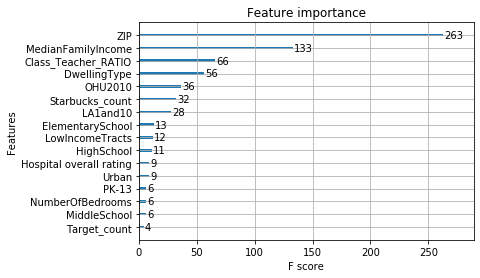

In [194]:
xgb.plot_importance(regressor)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [195]:
df.head()

,ZIP,NumberOfBedrooms,DwellingType,Pricing,ElementarySchool,MiddleSchool,HighSchool,PK-13,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Hospital overall rating,hasfood,hashoospital
0,1001,1,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
1,1001,1,2.0,194297.916667,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
2,1001,2,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
3,1001,2,2.0,194297.916667,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
4,1001,3,1.0,134261.458333,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False


In [196]:
df.shape

(61722, 19)

In [197]:
df.apply(lambda x: sum(x.isnull()))

ZIP                        0
NumberOfBedrooms           0
DwellingType               0
Pricing                    0
ElementarySchool           0
MiddleSchool               0
HighSchool                 0
PK-13                      0
Class_Teacher_RATIO        0
Urban                      0
OHU2010                    0
LowIncomeTracts            0
MedianFamilyIncome         0
LA1and10                   0
Starbucks_count            0
Target_count               0
Hospital overall rating    0
hasfood                    0
hashoospital               0
dtype: int64

### Dimensional Reduction & Quick Analysis

#### PCA
Run PCA to get an idea of the number of features that explain at least 80% of the variance

In [198]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [199]:
def scaled(df):
    return pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

train_standardized = scaled(X)

In [200]:
def fit_pca(df, n_components):
    pca = PCA(n_components)  
    pca = pca.fit(df)  #fit the PCA model to the df
    
    return pca

In [201]:
# we keep only 10 components
n_components = 10
pca = fit_pca(train_standardized, n_components=n_components)

In [202]:
def plot_scaled_variance(pca):
    #same as above, create a subplot, decorate the plot, and show the percentage of variance
    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Fraction of Explained Variance')
    ax.plot(pca.explained_variance_ratio_)   
    
    return ax

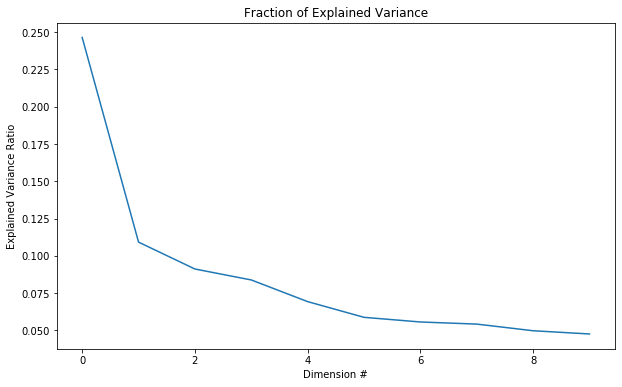

In [203]:
ax = plot_scaled_variance(pca)

#### Cluster using DBSCAN

In [204]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler
data= X
#turn to matrix
data = data.values.astype("float32", copy = False)

#Create a standardizer
data_standardized = StandardScaler().fit_transform(data)

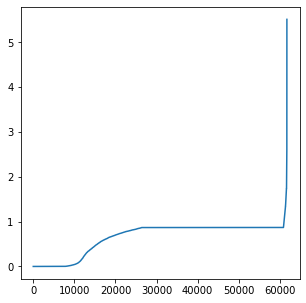

In [205]:
#Apply k-nearest to determine best suitable esp neighborhood for DBSCAN (the knee in the plot)
#min.sample = # of dimensions + 1 --> 2+1 = 3. Use 3 to start with. 
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(data_standardized)
distances, indices = nbrs.kneighbors(data_standardized)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Text(0, 0.5, 'Feature2')

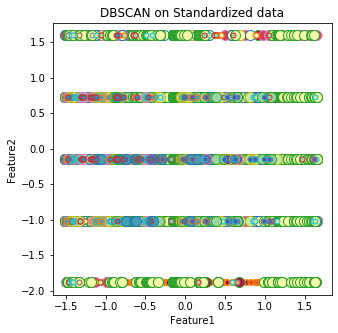

In [206]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np
from matplotlib import pyplot as plt

#fit data to DBSCAN function. In this case use radius (aka epsilon) of 1 per k-nearest and min_samples of 19
dbsc = DBSCAN(eps = 1, min_samples = 19).fit(data_standardized)
#Get the cluster labels
labels = dbsc.labels_
#Identify the core and border points
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

#Pair labels with colors
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

#Plot the data 
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data_standardized[class_member_mask & core_samples]  
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data_standardized[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
    
#Decorate the plot
plt.title("DBSCAN on Standardized data")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

### Balancing Imbalanced Dataset

In [207]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from pylab import rcParams
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
#LABELS = ["", ""]

In [208]:
data = pd.read_csv('CleanHouseFinal_nomissing.csv')
data = data.drop("Unnamed: 0",axis=1)
data.columns.tolist()

['ZIP',
 'NumberOfBedrooms',
 'DwellingType',
 'Pricing',
 'ElementarySchool',
 'MiddleSchool',
 'HighSchool',
 'PK-13',
 'Class_Teacher_RATIO',
 'Urban',
 'OHU2010',
 'LowIncomeTracts',
 'MedianFamilyIncome',
 'LA1and10',
 'Starbucks_count',
 'Target_count',
 'Hospital overall rating',
 'hasfood',
 'hashoospital']

In [209]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
state = np.random.RandomState(42)
columns = [c for c in columns if c not in ["Unnamed: 0"]]
# Store the variable we are predicting 
target = "Pricing"

In [210]:
X = data.drop("Pricing",axis=1)
y = data["Pricing"]
print(X.shape)
print(y.shape)

(61722, 18)
(61722,)


In [211]:
X.head()

,ZIP,NumberOfBedrooms,DwellingType,ElementarySchool,MiddleSchool,HighSchool,PK-13,Class_Teacher_RATIO,Urban,OHU2010,LowIncomeTracts,MedianFamilyIncome,LA1and10,Starbucks_count,Target_count,Hospital overall rating,hasfood,hashoospital
0,1001,1,1.0,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
1,1001,1,2.0,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
2,1001,2,1.0,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
3,1001,2,2.0,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False
4,1001,3,1.0,0.666667,0.166667,0.166667,0.0,15.247192,1.0,2098.0,0.2,73672.8,1.0,0.0,0.0,0.0,True,False


In [212]:
#Finding if any any null values present
data.isnull().values.any()

False

Check whether the pricing ais normally distribution

In [213]:
y.describe()

count    6.172200e+04
mean     2.419257e+05
std      2.328879e+05
min      3.041169e+04
25%      1.212510e+05
50%      1.744094e+05
75%      2.825323e+05
max      4.536160e+06
Name: Pricing, dtype: float64

(array([5.6287e+04, 4.4040e+03, 6.9200e+02, 1.7100e+02, 6.6000e+01,
        3.8000e+01, 3.8000e+01, 7.0000e+00, 5.0000e+00, 1.4000e+01]),
 array([  30411.68831169,  480986.56114719,  931561.43398268,
        1382136.30681818, 1832711.17965368, 2283286.05248918,
        2733860.92532468, 3184435.79816017, 3635010.67099567,
        4085585.54383117, 4536160.41666667]),
 <a list of 10 Patch objects>)

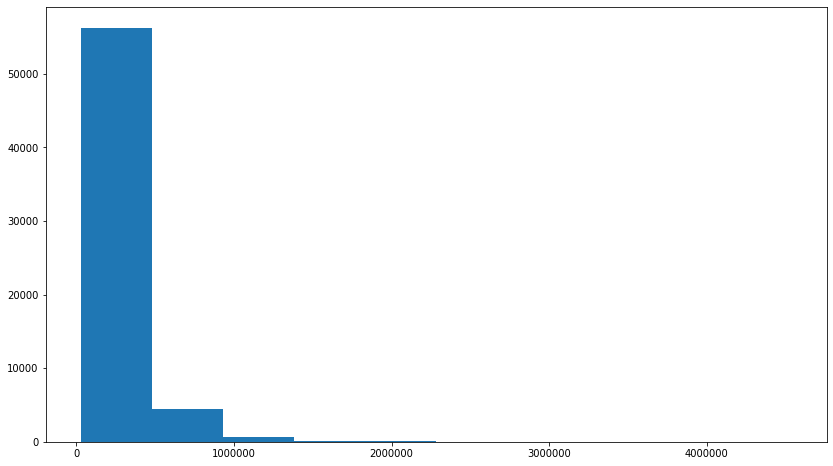

In [214]:
# check the distribution plot
from matplotlib import pyplot
pyplot.hist(y)

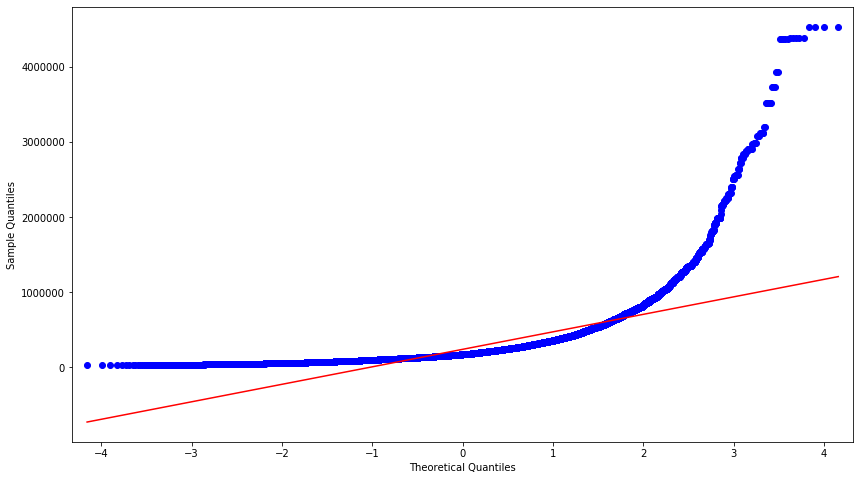

In [215]:
# q-q plot
from statsmodels.graphics.gofplots import qqplot
qqplot(y, line='s')
pyplot.show()

In [216]:
from scipy.stats import shapiro
stat, p = shapiro(y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Pricing looks Gaussian (fail to reject H0)')
else:
    print('Pricing does not look Gaussian (reject H0)')


Statistics=0.602, p=0.000
Pricing does not look Gaussian (reject H0)


In [217]:
#df[df['Pricing']>282532]
y = data[["Pricing"]]

In [218]:
y['pricing_class'] = ['abnormal' if x >282532 else 'normal' for x in y['Pricing']]

Balance data using SMOTE

In [219]:
#pip install --upgrade scikit-learn

In [220]:
#pip install imblearn
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(sampling_strategy='auto')

#X_sm, y_sm = sm.fit_sample(X, y['pricing_class'])
#X_sm.shape, y_sm.shape

In [221]:
from collections import Counter
#print('Original dataset shape {}'.format(Counter(y_sm)))
#print('Resampled dataset shape {}'.format(Counter(y_sm)))

Apply model after SMOTE

In [222]:
# lr = LogisticRegression(solver='liblinear')
# lr.fit(X_train_sm,y_train_sm)

# y_pred = lr.predict(X_test)
# print("Accuracy of LR classifier on test set after oversampling is {}".format(accuracy_score(y_test,y_pred)))

In [223]:
# pd.crosstab(y_test,y_pred)

In [224]:
# print("Percentage of correct classification of 0(Non_fraud) is {}".format(55981/56858))
# print("Percentage of correct classification of 1(fraud) is {}".format(91/104))

### Model Training

In [225]:
#(test as much algorithm as possible, possible models include Random Forest, Gradient Boosting, Ada-Boosting, Voting Classifier...)

In [226]:
data = pd.read_csv('CleanHouseFinal_nomissing.csv')
data = data.drop("Unnamed: 0",axis=1)
data.columns.tolist()

['ZIP',
 'NumberOfBedrooms',
 'DwellingType',
 'Pricing',
 'ElementarySchool',
 'MiddleSchool',
 'HighSchool',
 'PK-13',
 'Class_Teacher_RATIO',
 'Urban',
 'OHU2010',
 'LowIncomeTracts',
 'MedianFamilyIncome',
 'LA1and10',
 'Starbucks_count',
 'Target_count',
 'Hospital overall rating',
 'hasfood',
 'hashoospital']

In [227]:
#Create array of features X and array of dependent variable y
X = data.drop("Pricing",axis=1)
y = data["Pricing"]
print(X.shape)
print(y.shape)

(61722, 18)
(61722,)


In [228]:
X.columns

Index(['ZIP', 'NumberOfBedrooms', 'DwellingType', 'ElementarySchool', 'MiddleSchool', 'HighSchool', 'PK-13', 'Class_Teacher_RATIO', 'Urban', 'OHU2010', 'LowIncomeTracts', 'MedianFamilyIncome', 'LA1and10', 'Starbucks_count', 'Target_count', 'Hospital overall rating', 'hasfood', 'hashoospital'], dtype='object')

In [229]:
#Reshape y to a 1 dimensional array
y = y.values

In [230]:
y

array([134261.45833333, 194297.91666667, 134261.45833333, ...,
       242763.54166667, 119436.45833333, 242763.54166667])

In [231]:
#Reshape y to a 2 dimensional arrary needed for standarization 
y = y.reshape(len(y),1)

In [232]:
y

array([[134261.45833333],
       [194297.91666667],
       [134261.45833333],
       ...,
       [242763.54166667],
       [119436.45833333],
       [242763.54166667]])

In [233]:
#Split the data into train and test
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)

In [234]:
sc_X = StandardScaler()

In [235]:
sc_y = StandardScaler()

In [236]:
#Standarized train_X
train_X = sc_X.fit_transform(train_X)

In [237]:
#Standarized train_y
train_y = sc_y.fit_transform(train_y)

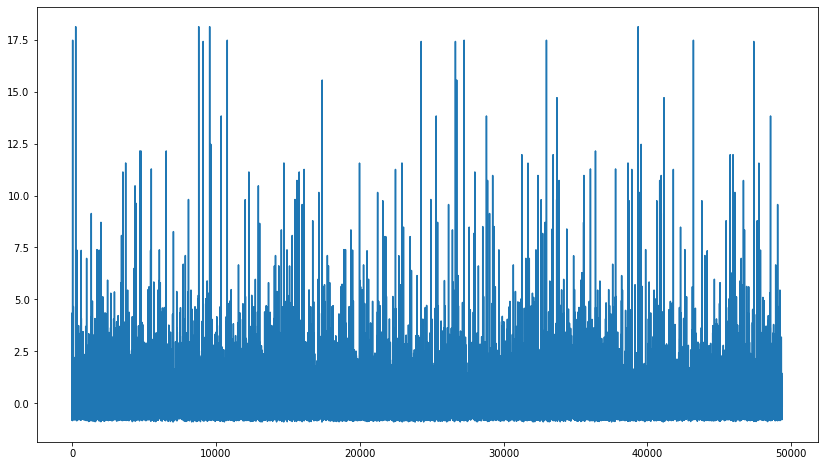

In [238]:
plt.plot(train_y)

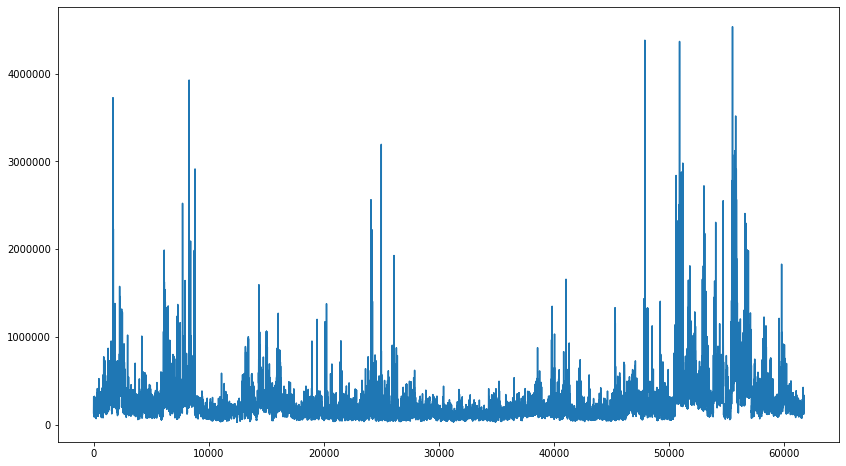

In [239]:
plt.plot(y)

In [240]:
train_y

array([[ 0.36944456],
       [-0.42175594],
       [-0.34537942],
       ...,
       [-0.56219064],
       [ 1.04933494],
       [-0.1269222 ]])

In [241]:
train_X

array([[-1.25558072,  0.72469279,  0.71385189, ..., -0.45687514,
         0.51626696, -0.47734261],
       [ 0.67000131, -1.8787915 ,  0.71385189, ...,  1.99124162,
         0.51626696,  2.09493134],
       [ 0.04899493, -0.14313531, -1.40085082, ..., -0.45687514,
        -1.93698237, -0.47734261],
       ...,
       [ 0.24031086, -1.8787915 , -1.40085082, ..., -0.45687514,
         0.51626696, -0.47734261],
       [-0.47513369,  0.72469279,  0.71385189, ..., -0.45687514,
        -1.93698237, -0.47734261],
       [ 0.64643992, -1.8787915 ,  0.71385189, ..., -0.45687514,
         0.51626696, -0.47734261]])

Standardize the dataset

In [242]:
#Standardize the following columns: 
#train_s = X[['NumberOfBedrooms', 'Class_Teacher_RATIO', 'OHU2010', 'MedianFamilyIncome', 'Hospital overall rating']]

In [243]:
#train_standardized = StandardScaler().fit_transform(train_s)

In [244]:
#non-standardized columns
#train_ns = X[['ZIP', 'DwellingType', 'ElementarySchool', 'MiddleSchool', 'HighSchool', 'PK-13', 'Urban', 'LowIncomeTracts',
#                   'LA1and10', 'Starbucks_count', 'Target_count']]
#train_ns = train_ns.astype("float32", copy = False)

In [245]:
#y_standardized
#y_standardized = y

In [246]:
#Combine standardized and non-standardized
#train_standardized = np.hstack((train_standardized, train_ns))

In [247]:
#Create X_standardize and y_standardize variables from standardized train data set
#X_standardized, y_standardized = train_standardized, y_standardized

In [248]:
#Splitting the main data into 80/20 ratio
#train_X, test_X, train_y, test_y = train_test_split(X_standardized, y_standardized, test_size=0.20, random_state=27)

#### Linear Regression Model

X and y 

Standardized variables to consider: train_X, train_y, test_X, test_y

Non standardized variables to consider: X_train, X_test, y_train, y_test

In [249]:
#Import
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE

##### Non-Standardized Training Set

In [250]:
#Splitting the main data into 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [251]:
#Instantiate function
regressor = LinearRegression() 

In [252]:
#fit the model with training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
# Compute y predictor: predict the target (Y) on the testing dataset
y_pred = regressor.predict(X_test)

Desired Error

In [254]:
## Evaluate the RMSE on the testing dataset to get the desired error
# Compute mse
mse = MSE(y_test, y_pred)

# Compute rmse 
rmse = (mse**(1/2))

# Print rmse
print("Test set RMSE of dt: {:.2f}".format(rmse))

Test set RMSE of dt: 170360.40


Linear Regression: Training Error

In [255]:
#predict the target on the train dataset
y_pred_train = regressor.predict(X_train)

##Evaluate RMSE on the training dataset to get the training error
#Compute mse
mse = MSE(y_train, y_pred_train)

#Compute rmse 
RMSE_train = (mse**(1/2))

#Print RMSE train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 182983.03


Linear Regression: Cross Validation

In [256]:
## Cross Validate 
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = ((MSE_CV_scores.mean())**(1/2))

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 183091.45


##### Standardized Training Set

In [257]:
#Instantiate function
regressor = LinearRegression() 

In [258]:
#fit the model with training data
regressor.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
# Compute y predictor: predict the target (Y) on the testing dataset
pred_y = regressor.predict(test_X)

Desired Error

In [260]:
## Evaluate the RMSE on the testing dataset to get the desired error
# Compute mse
mse = MSE(test_y, pred_y)

# Compute rmse 
rmse = (mse**(1/2))

# Print rmse
print("Test set RMSE of dt: {:.2f}".format(rmse))

Test set RMSE of dt: 275181.65


Linear Regression: Training Error

In [261]:
#predict the target on the train dataset
y_pred_train = regressor.predict(train_X)

##Evaluate RMSE on the training dataset to get the training error
#Compute mse
mse = MSE(train_y, y_pred_train)

#Compute rmse 
RMSE_train = (mse**(1/2))

#Print RMSE train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 0.78


Linear Regression: Cross Validation

In [262]:
## Cross Validate 
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(regressor, train_X, train_y, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE 
RMSE_CV = ((MSE_CV_scores.mean())**(1/2))

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 0.78


#### Support Vector Regression (SVR)

In [263]:
from sklearn.svm import SVR
# Instantiate Support Vector Regressor
sv = SVR(kernel = 'rbf')

In [264]:
# Fit the data to the training set
sv.fit(train_X, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [265]:
# Predict test set labels
sv_y_pred = sv.predict(test_X)
print(sv_y_pred[0:10])

[0.70819479 0.70819479 0.70819479 0.70819479 0.70819479 0.70819479
 0.70819479 0.70819479 0.70819479 0.70819479]


In [266]:
# Predict test set labels
sv_y_pred = sc_y.inverse_transform(sv.predict(sc_X.transform(test_X)))
print(sv_y_pred[0:10])

[320917.41594001 114470.41816022 179562.4613956  143823.61380623
 196230.57460071 160401.68708835 197025.64096705 192956.98414712
 152524.79386733 127956.6873539 ]


In [267]:
from sklearn.metrics import r2_score

# Compute rmse_dt and R2, We might have to scale test_y MAYBE
r2_dt = r2_score(test_y, sv_y_pred)
rmse_dt = MSE(test_y, sv_y_pred)**(1/2)
print(rmse_dt, r2_dt)

133344.08615711465 0.6188095915777431


In [268]:
# Compute rmse_dt
mseCV_DT = cross_val_score(sv, train_X,train_y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmseCV_DT = (-mseCV_DT.mean())**(1/2)
print("RMSE score:", rmseCV_DT)

RMSE score: 0.6512022970002215


#### Decision Tree

In [269]:
# Import DecisionTreeRegressor from sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

Hyperparameter Tuning

In [270]:
#apply cv.train_test (produce new split here)
(X_train, X_test, y_train, y_test) = cv.train_test_split(X, y, test_size=.20)

In [271]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

# Create the random grid
random_grid = {'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'min_samples_leaf': [0.05, 0.1, 0.13, 0.15, 0.2, 0.26, 0.5]}


In [272]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeRegressor()

# Random search of parameters, using 10 fold cross validation, 
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

# Fit the random search model
dt_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_dis

In [273]:
#See what best parameters from fitting the random search: 
dt_random.best_params_

{'min_samples_leaf': 0.1, 'max_depth': 4}

Decision Tree

In [274]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.1,
                           random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

Decision Tree: Desired error

In [275]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt 
rmse_dt = (mse_dt**(1/2))

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 195301.64


Decision Tree: Cross Validation Error

In [276]:
from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE 
RMSE_CV = ((MSE_CV_scores.mean())**(1/2))

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 198546.72


Decision Tree: Training Error

In [277]:
# Fit dt to the training set
#dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt 
RMSE_train = ((MSE(y_train, y_pred_train))**(1/2))

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 198155.72


In [278]:
def feat_importances(m, df):
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

def plot_fi(fi): return fi.plot('cols', 'feat_imp', 'barh', figsize=(12,7), legend=False)

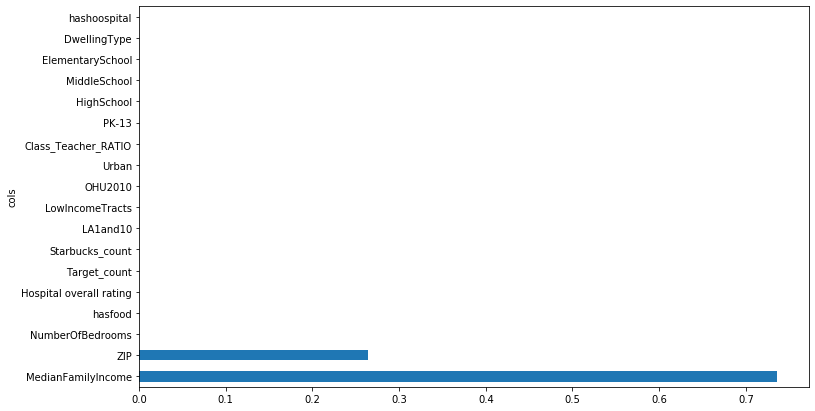

In [279]:
feature = feat_importances(dt,X_train)
plot_fi(feature).figure.savefig('fi_importance_dt')

#### Random Forest

In [280]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [281]:
# Set seed for reproducibility
SEED = 1
# Split dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

Hyperparameter Tuning

In [282]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [0.05, 0.10, 0.13, 0.15, 0.20, 0.26, 0.5]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [0.05, 0.1, 0.13, 0.15, 0.2, 0.26, 0.5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [283]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 10, random_state=3, n_jobs = -1)
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=3, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [284]:
#See what best parameters from fitting the random search: 
dt_random.best_params_

{'min_samples_leaf': 0.1, 'max_depth': 4}

In [285]:
# Instantiate a random forests regressor 'rf' 600 estimators
rf = RandomForestRegressor(n_estimators=600,
                           min_samples_leaf=0.1, random_state=SEED)

# Fit 'rf' to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

Random Forest: Desired Error

In [286]:
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test, y_pred)**(1/2))

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 204785.74


Random Forest: Train Error

In [287]:
# Predict the train features
y_pred_train=rf.predict(X_train)

# Evaluate the train set RMSE 
rmse_train = (MSE(y_train, y_pred_train)**(1/2))

# Print the train set RMSE
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Train set RMSE of rf: 201373.10


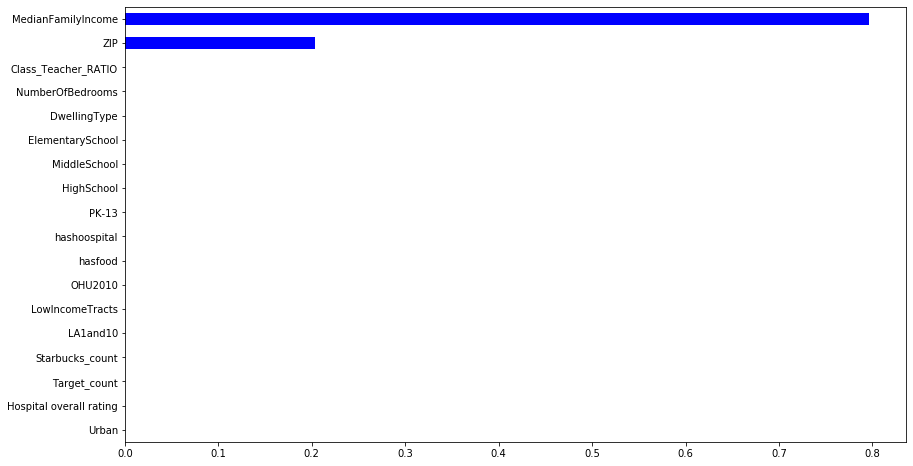

In [288]:
#Don't need to do cross-validation when using random forest because mutliple bagging in process of training random forest 
#prevents over-fitting.
import pandas as pd
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

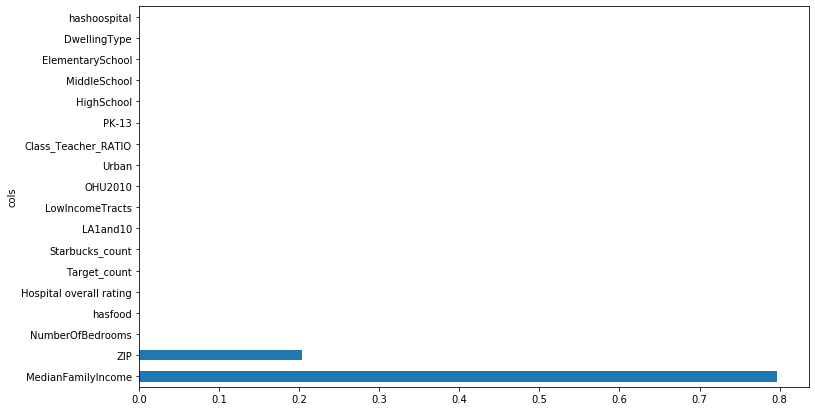

In [289]:
feature = feat_importances(rf,X_train)
plot_fi(feature).figure.savefig('fi_importance_rf')

#### Gradient Boosting

In [290]:
# Instantiate Gradient Boosting
gb = GradientBoostingRegressor(random_state=0)

# Fit the data to the training set
gb.fit(X_train, y_train)

# Predict test set labels
gb_y_pred = gb.predict(X_test)
print(gb_y_pred[0:10])

[408397.30166299 152399.9667435  173793.73474368 250401.35594681
 489645.63745338 232209.35943683 278724.88725748 123813.29162501
 359965.92620311 356676.57083614]


In [291]:
RMSE = gb.score(X_test, y_test)
print("RMSE score:", RMSE)

RMSE score: 0.6877265256712172


In [292]:
from sklearn.model_selection import cross_val_score

In [293]:
# Compute rmse_dt
mseCV_DT = cross_val_score(gb, X_train,y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rmseCV_DT = (-mseCV_DT.mean())**(1/2)
print("RMSE score:", rmseCV_DT)

RMSE score: 131471.8818602934


### KNN for regression
https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

RMSE value for k=  1 is: 321078.09784662124
RMSE value for k=  2 is: 321078.06711051555
RMSE value for k=  3 is: 321078.1159636293
RMSE value for k=  4 is: 321078.2167021968
RMSE value for k=  5 is: 321079.11846096773
RMSE value for k=  6 is: 321079.86296580936
RMSE value for k=  7 is: 321080.5571484199
RMSE value for k=  8 is: 321081.1078412508
RMSE value for k=  9 is: 321081.54254617397
RMSE value for k=  10 is: 321081.81739198754
RMSE value for k=  11 is: 321082.02526083
RMSE value for k=  12 is: 321082.2087511925
RMSE value for k=  13 is: 321082.30103925633
RMSE value for k=  14 is: 321082.4111924306
RMSE value for k=  15 is: 321082.49880416074
RMSE value for k=  16 is: 321082.5978543956
RMSE value for k=  17 is: 321082.68936153484
RMSE value for k=  18 is: 321082.75715127314
RMSE value for k=  19 is: 321082.8612759607
RMSE value for k=  20 is: 321082.9790682916


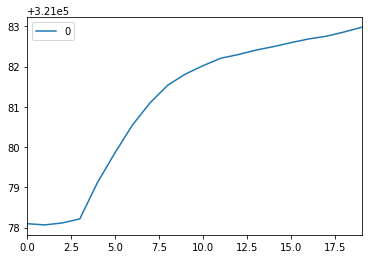

In [294]:
#Look at error rate for different K values
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(train_X, train_y)  #fit the model
    pred=model.predict(test_X) #make prediction on test set
    error = sqrt(mean_squared_error(test_y,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [295]:
#To decide value of k, implement GridsearchCV
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(train_X, train_y)
model.best_params_

{'n_neighbors': 2}

## xgboost

In [296]:
#conda install -c conda-forge xgboos
#conda install -c anaconda py-xgboost
#!pip install xgboost
#!pip install light-famd

import xgboost as xgb
from sklearn.metrics import mean_squared_error
#from light_famd import FAMD

In [297]:
X = df.drop(columns=['Pricing'])
y = df['Pricing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [298]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3)
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [299]:
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)

11797766787.920378

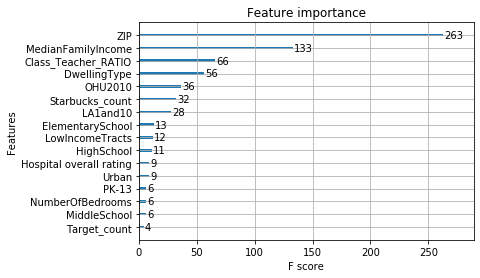

In [300]:
xgb.plot_importance(regressor)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Save model to pickle

In [301]:
#To save model to pickle import
import pickle

#Save
model_xgboost_file = open("FinalProjectModel.pkl", "wb")
pickle.dump(regressor, model_xgboost_file)

#### Load and apply model

In [302]:
#loading
model_xgboost_file = open('FinalProjectModel.pkl', 'rb')
xgboost_pi2 = pickle.load(model_xgboost_file)

In [303]:
#Apply the model: use loaded picked model to make predictions
#this is the code used to apply the model used to make predictions.  
y_pred_train = xgboost_pi2.predict(X_test)

In [304]:
print(y_pred_train)

[350799.9  275314.12 136161.77 ... 230833.88  98525.46 133719.33]


In [305]:
PredictionsFinal = pd.DataFrame(y_pred_train)

In [306]:
PredictionsFinal.head()

,0
0,350799.906250
1,275314.125000
2,136161.765625
3,217931.484375
4,106585.070312


In [307]:
#Save Results to csv
PredictionsFinal.to_csv("FinalProjectResults.csv",index=False)